In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datadir='data/'
dset = '_at30S_mvt_rho2_basins.csv'

ddict = {mod:{} for mod in ['CM4','ESM4']}

In [3]:
for mod in ddict:

    ddict_exp = {exp:{} for exp in ['control','antwater','stress','antwaterstress']}
    for exp in ddict_exp:
        
        if exp == 'control':
            files = glob.glob(datadir+'%s_%s_so_*'%(mod,exp)+dset)
            
            if len(files)>1:
                print('WARNING: More than one file. Please specify.')
            elif len(files)==0:
                print('ERROR: No file available for '+mod+'-'+exp)
                ddict_exp[exp] = []
                continue
                
            print('Loading '+files[0])
            ddict_exp[exp]['df'] = pd.read_csv(files[0],index_col='rho2_l')
        
        else:
            ddict_mem = {mem:{} for mem in (['251', '290', '332'] if mod=='CM4' else ['101', '151', '201'])}
            for mem in ddict_mem:
                files = glob.glob(datadir+'%s_%s_%s_so_*'%(mod,exp,mem)+dset)
                if len(files)>1:
                    print('WARNING: More than one file for %s. Please specify.'%dset)
                elif len(files)==0:
                    print('ERROR: No file available for %s'%dset,mod+'-'+exp+'-'+mem)
                    ddict_mem[mem] = []
                    continue
                print('Loading '+files[0])
                ddict_mem[mem]['df'] = pd.read_csv(files[0],index_col='rho2_l')
            ddict_exp[exp] = ddict_mem
            
    ddict[mod] = ddict_exp

Loading data/CM4_control_so_0281to0380_at30S_mvt_rho2_basins.csv
Loading data/CM4_antwater_251_so_0051to0070_at30S_mvt_rho2_basins.csv
Loading data/CM4_antwater_290_so_0051to0070_at30S_mvt_rho2_basins.csv
Loading data/CM4_antwater_332_so_0051to0070_at30S_mvt_rho2_basins.csv
Loading data/CM4_stress_251_so_0051to0070_at30S_mvt_rho2_basins.csv
Loading data/CM4_stress_290_so_0051to0070_at30S_mvt_rho2_basins.csv
Loading data/CM4_stress_332_so_0051to0070_at30S_mvt_rho2_basins.csv
Loading data/CM4_antwaterstress_251_so_0051to0070_at30S_mvt_rho2_basins.csv
Loading data/CM4_antwaterstress_290_so_0051to0070_at30S_mvt_rho2_basins.csv
Loading data/CM4_antwaterstress_332_so_0051to0070_at30S_mvt_rho2_basins.csv
Loading data/ESM4_control_so_0121to0220_at30S_mvt_rho2_basins.csv
Loading data/ESM4_antwater_101_so_0151to0170_at30S_mvt_rho2_basins.csv
Loading data/ESM4_antwater_151_so_0051to0070_at30S_mvt_rho2_basins.csv
Loading data/ESM4_antwater_201_so_0051to0070_at30S_mvt_rho2_basins.csv
Loading data/E

In [4]:
for mod in ddict:
    for exp in ddict_exp:
        ddict[mod][exp]['basin'] = {b:{} for b in ['Atlantic','Pacific','Indian']}
        
        ddict[mod][exp]['basin']['Atlantic']['water_mass'] = ['Upper','SAMW','AAIW','NADW','AABW']
        ddict[mod][exp]['basin']['Pacific']['water_mass'] = ['Upper','SAMW','AAIW','CDW','AABW']
        ddict[mod][exp]['basin']['Indian']['water_mass'] = ['Upper','SAMW','AAIW','CDW','AABW']

In [5]:
# CM4 (control)
ddict['CM4']['control']['basin']['Atlantic']['sig2'] = [35.3, 35.9, 36.55, 37.08]
ddict['CM4']['control']['basin']['Pacific']['sig2'] = [35.8, 36.2, 36.6, 37.05]
ddict['CM4']['control']['basin']['Indian']['sig2'] = [35.7, 36.2, 36.6, 37.065]

# ESM4 (control)
ddict['ESM4']['control']['basin']['Atlantic']['sig2'] = [35.2, 35.4, 36.55, 37.08]
ddict['ESM4']['control']['basin']['Pacific']['sig2'] = [35.3, 35.65, 36.45, 37.01]
ddict['ESM4']['control']['basin']['Indian']['sig2'] = [35.2, 35.7, 36.6, 37.01]

# CM4 (antwater)
ddict['CM4']['antwater']['basin']['Atlantic']['sig2'] = [35.3, 35.9, 36.55, 37.08]
ddict['CM4']['antwater']['basin']['Pacific']['sig2'] = [35.8, 36.2, 36.6, 37.05]
ddict['CM4']['antwater']['basin']['Indian']['sig2'] = [35.7, 36.2, 36.6, 37.065]

# ESM4 (antwater)
ddict['ESM4']['antwater']['basin']['Atlantic']['sig2'] = [35.2, 35.4, 36.55, 37.08]
ddict['ESM4']['antwater']['basin']['Pacific']['sig2'] = [35.3, 35.65, 36.45, 37.01]
ddict['ESM4']['antwater']['basin']['Indian']['sig2'] = [35.2, 35.7, 36.6, 37.01]

# CM4 (stress)
ddict['CM4']['stress']['basin']['Atlantic']['sig2'] = [35.3, 35.9, 36.55, 37.08]
ddict['CM4']['stress']['basin']['Pacific']['sig2'] = [35.8, 36.2, 36.6, 37.05]
ddict['CM4']['stress']['basin']['Indian']['sig2'] = [35.7, 36.2, 36.6, 37.065]

# ESM4 (stress)
ddict['ESM4']['stress']['basin']['Atlantic']['sig2'] = [35.2, 35.4, 36.55, 37.08]
ddict['ESM4']['stress']['basin']['Pacific']['sig2'] = [35.3, 35.65, 36.45, 37.01]
ddict['ESM4']['stress']['basin']['Indian']['sig2'] = [35.2, 35.7, 36.6, 37.01]

# CM4 (antwaterstress)
ddict['CM4']['antwaterstress']['basin']['Atlantic']['sig2'] = [35.3, 35.9, 36.55, 37.08]
ddict['CM4']['antwaterstress']['basin']['Pacific']['sig2'] = [35.8, 36.2, 36.6, 37.05]
ddict['CM4']['antwaterstress']['basin']['Indian']['sig2'] = [35.7, 36.2, 36.6, 37.065]

# ESM4 (antwaterstress)
ddict['ESM4']['antwaterstress']['basin']['Atlantic']['sig2'] = [35.2, 35.4, 36.55, 37.08]
ddict['ESM4']['antwaterstress']['basin']['Pacific']['sig2'] = [35.3, 35.65, 36.45, 37.01]
ddict['ESM4']['antwaterstress']['basin']['Indian']['sig2'] = [35.2, 35.7, 36.6, 37.01]

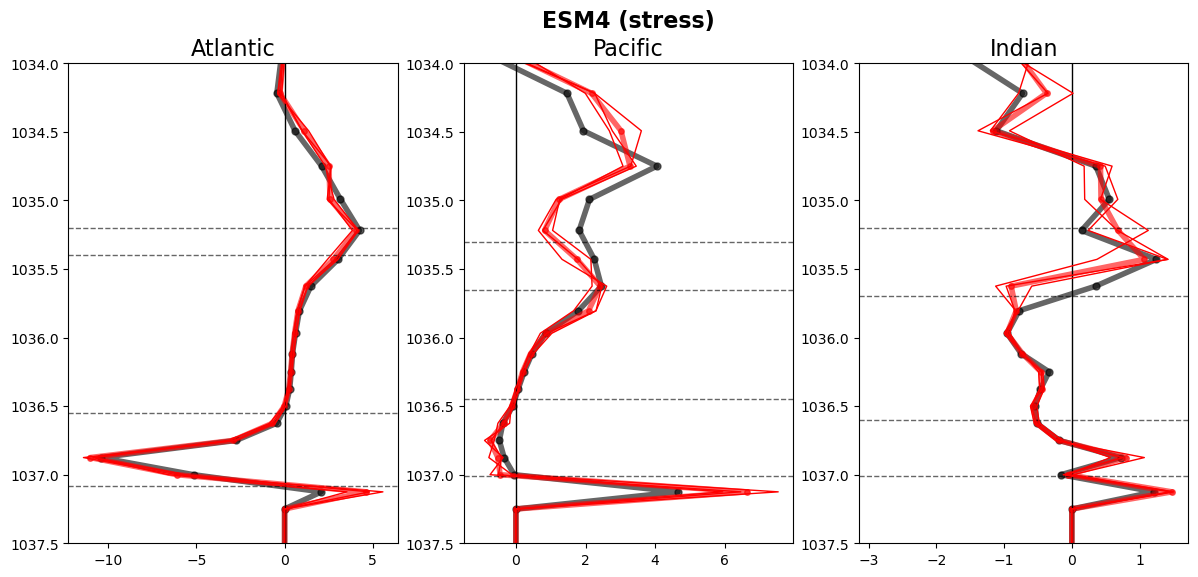

In [6]:
mod, exp = 'ESM4', 'stress'

fig, axs = plt.subplots(1, 3, figsize=(14,6))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2)
fig.suptitle('%s (%s)'%(mod,exp), fontsize=16, fontweight='bold', y=0.99)

for idx, name in enumerate(ddict[mod]['control']['basin']):
    axs[idx].axvline(x=0, c = 'k', ls='-', lw=1)
    
    for sidx, sig in enumerate(ddict[mod]['control']['basin'][name]['sig2']):
        axs[idx].axhline(y=sig+1000, c = 'k', ls='--', lw=1,alpha=0.6)
        
    axs[idx].plot(ddict[mod]['control']['df'][name],ddict[mod]['control']['df'].index,lw=4,c='k',marker='o',ms=5,
                  label='Mean',zorder=0,alpha=0.6)
    dfs = {}
    for i, mem in enumerate(['251', '290', '332'] if mod=='CM4' else ['101', '151', '201']):
        axs[idx].plot(ddict[mod][exp][mem]['df'][name],ddict[mod][exp][mem]['df'].index,lw=1,
                      c='b' if exp=='antwater' else 'r' if exp=='stress' else 'g',label=mem)
        axs[idx].set_title(name,fontsize=16)
        axs[idx].set_ylim([1034,1037.5])
        #axs[idx].set_xlim([-2,2])
        axs[idx].invert_yaxis()
        
        dfs[i] = ddict[mod][exp][mem]['df']
    
    df_mean = pd.concat(dfs).groupby(level=1).mean()
    axs[idx].plot(df_mean[name],df_mean.index,lw=4,c='b' if exp=='antwater' else 'r' if exp=='stress' else 'g',
                  marker='o',ms=4,label='Mean',zorder=1,alpha=0.6)
    
plt.show()

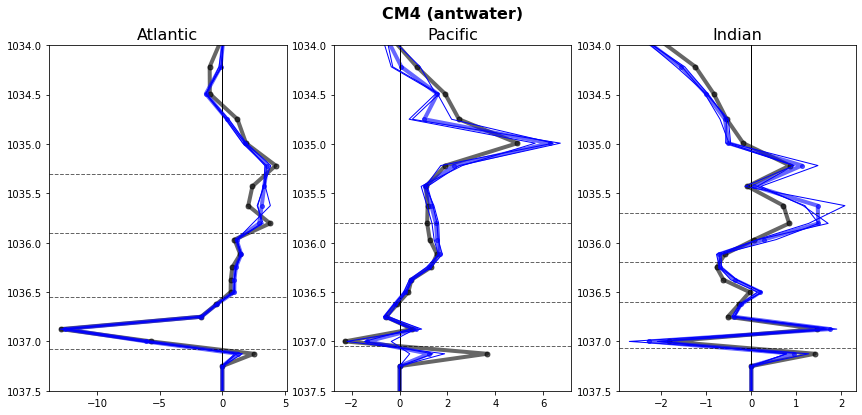

In [7]:
for mod in ddict:
    for exp in ddict_exp:
        if exp == 'control':
            continue
        for i, mem in enumerate(['251', '290', '332'] if mod=='CM4' else ['101', '151', '201']):
            ddict[mod][exp][mem]['basin'] = {b:{} for b in ['Atlantic','Pacific','Indian']}
            ddict[mod][exp][mem]['basin']['Atlantic']['water_mass'] = ['Upper','SAMW','AAIW','NADW','AABW']
            ddict[mod][exp][mem]['basin']['Pacific']['water_mass'] = ['Upper','SAMW','AAIW','CDW','AABW']
            ddict[mod][exp][mem]['basin']['Indian']['water_mass'] = ['Upper','SAMW','AAIW','CDW','AABW']

In [8]:
for mod in ddict:
    for exp in ddict[mod]:  
        if exp == 'control':
            continue
        for i, mem in enumerate(['251', '290', '332'] if mod=='CM4' else ['101', '151', '201']):
            print(mod,exp,mem)
            df = ddict[mod][exp][mem]['df']
            
            for idx, (name, values) in enumerate(df.iteritems()):
                print('\n',idx,name)
                vtrsp = []
                
                for widx, wm in enumerate(ddict[mod][exp]['basin'][name]['water_mass']):
                    print(widx,wm)
                    
                    if widx ==0:
                        print('Sum above',ddict[mod][exp]['basin'][name]['sig2'][widx])
                        vtrsp.append(df[df.index<ddict[mod][exp]['basin'][name]['sig2'][widx]+1000][name].sum())
                        
                    elif widx < (len(ddict[mod][exp]['basin'][name]['water_mass'])-1):
                        print('Sum between',ddict[mod][exp]['basin'][name]['sig2'][widx-1],
                              'and',ddict[mod][exp]['basin'][name]['sig2'][widx])
                        
                        vtrsp.append(df[(df.index>=ddict[mod][exp]['basin'][name]['sig2'][widx-1]+1000)\
                                        &(df.index<ddict[mod][exp]['basin'][name]['sig2'][widx]+1000)][name].sum())

                    else:
                        print('Sum below',ddict[mod][exp]['basin'][name]['sig2'][widx-1])
                        vtrsp.append(df[df.index>=ddict[mod][exp]['basin'][name]['sig2'][widx-1]+1000][name].sum())
                    
                ddict[mod][exp][mem]['basin'][name]['vol_trsp'] = vtrsp

CM4 antwater 251

 0 Atlantic
0 Upper
Sum above 35.3
1 SAMW
Sum between 35.3 and 35.9
2 AAIW
Sum between 35.9 and 36.55
3 NADW
Sum between 36.55 and 37.08
4 AABW
Sum below 37.08

 1 Pacific
0 Upper
Sum above 35.8
1 SAMW
Sum between 35.8 and 36.2
2 AAIW
Sum between 36.2 and 36.6
3 CDW
Sum between 36.6 and 37.05
4 AABW
Sum below 37.05

 2 Indian
0 Upper
Sum above 35.7
1 SAMW
Sum between 35.7 and 36.2
2 AAIW
Sum between 36.2 and 36.6
3 CDW
Sum between 36.6 and 37.065
4 AABW
Sum below 37.065
CM4 antwater 290

 0 Atlantic
0 Upper
Sum above 35.3
1 SAMW
Sum between 35.3 and 35.9
2 AAIW
Sum between 35.9 and 36.55
3 NADW
Sum between 36.55 and 37.08
4 AABW
Sum below 37.08

 1 Pacific
0 Upper
Sum above 35.8
1 SAMW
Sum between 35.8 and 36.2
2 AAIW
Sum between 36.2 and 36.6
3 CDW
Sum between 36.6 and 37.05
4 AABW
Sum below 37.05

 2 Indian
0 Upper
Sum above 35.7
1 SAMW
Sum between 35.7 and 36.2
2 AAIW
Sum between 36.2 and 36.6
3 CDW
Sum between 36.6 and 37.065
4 AABW
Sum below 37.065
CM4 antwater 3

/var/folders/k8/0ndg22m53gl22p6l2b0ty7pw0000gn/T/ipykernel_42912/2228170388.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, (name, values) in enumerate(df.iteritems()):


In [9]:
ddict_basin = {b:{} for b in ['Atlantic','Pacific','Indian']}
ddict_basin['Atlantic']['water_mass'] = ['Upper','SAMW','AAIW','NADW','AABW']
ddict_basin['Pacific']['water_mass'] = ['Upper','SAMW','AAIW','CDW','AABW']
ddict_basin['Indian']['water_mass'] = ['Upper','SAMW','AAIW','CDW','AABW']

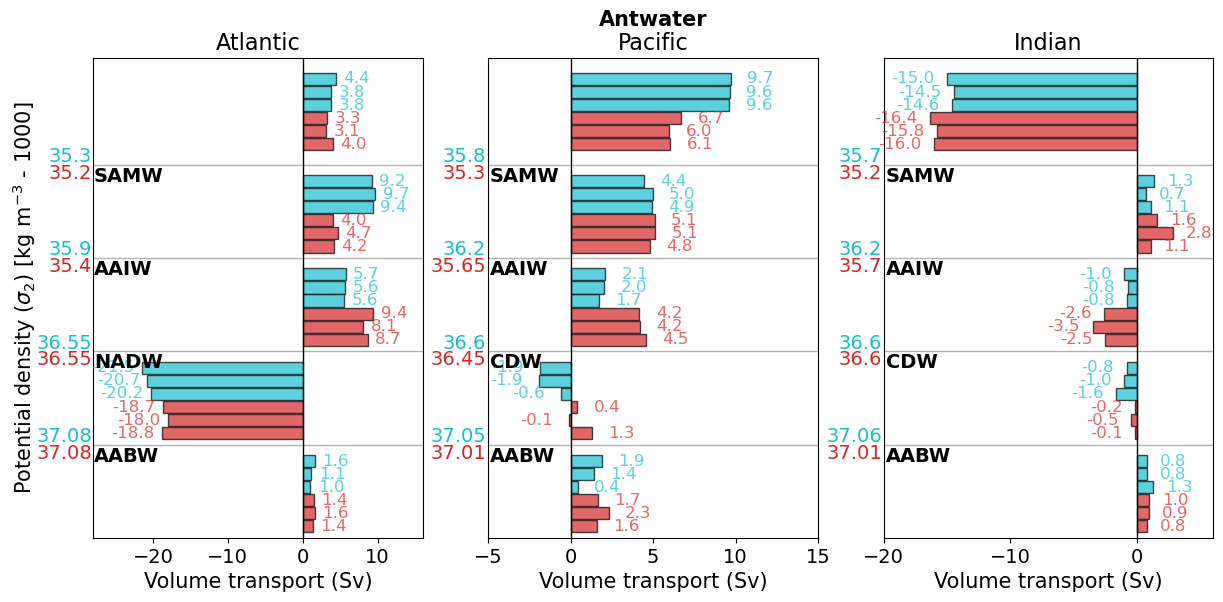

In [10]:
exp = 'antwater'

n = 6 # Number of bars to plot: 2 mod * 3 exp = 6 bars
barw = 0.10*1.3
gap = 0.01 # Gap between each bar
cstr = ['tab:cyan','tab:red']

fig, axs = plt.subplots(1, 3, figsize=(14,6))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2)
fig.suptitle(exp.capitalize(),fontsize=15,fontweight='bold')

for idx, name in enumerate(ddict_basin):
    
    axs[idx].axvline(x=0, c = 'k', ls='-', lw=1)
    
    y = np.arange(len(ddict_basin[name]['water_mass'])) + 0.5
    yloc = y + np.array([-0.1,0,0,0,0])
    
    p = []
    for m, mod in enumerate(ddict):
        for i, mem in enumerate(list(ddict[mod][exp].keys())[:-1]):
            i_bar = 3*m+i
            position = yloc + (barw*(1-n)/2) + i_bar*(barw+gap)
            x = list(np.array(ddict[mod][exp][mem]['basin'][name]['vol_trsp']))
            p += axs[idx].barh(position, x, height=barw, align='center', color=cstr[m], alpha=0.7, edgecolor='k')
            
        
    for i, bar in enumerate(p):
        val = bar.get_width()
        axs[idx].text(bar.get_width()+1 if val>0 else bar.get_width()-1, bar.get_y() + bar.get_height() / 2.0, 
                      f'{val:.1f}', ha='right' if val<0 else 'left', va='center',fontsize=12,
                      color=bar.get_facecolor())
        
    # Add subtitles and adjust xlimit
    if name=='Atlantic':
        axs[idx].set_title('Atlantic',fontsize=16)
        axs[idx].set_xlim([-28,16])
    elif name=='Pacific':
        axs[idx].set_title('Pacific',fontsize=16)
        axs[idx].set_xlim([-5,15])
    elif name=='Indian':
        axs[idx].set_title('Indian',fontsize=16)
        axs[idx].set_xlim([-20,6])
        
    # Add water mass names
    xlimit = axs[idx].get_xlim()
    for i, yline in enumerate(y[1:]-0.5):
        axs[idx].text(xlimit[0]+abs(xlimit[1]+xlimit[0])/100, yline+0.02, ddict_basin[name]['water_mass'][i+1], 
                      fontsize=14, fontweight='bold',ha='left', va='top')
        
    axs[idx].grid(True, 'major', 'y', ls='-', lw=1, c='k', alpha=.3)
    axs[idx].tick_params(axis='both', which='both', labelsize=14,
                         bottom=True, top=False, labelbottom=True,
                         left=False, right=False, labelleft=False)
    
    axs[idx].set_ylim((-0.15,5))
    axs[idx].set_yticks(y[1:]-0.5)
    #axs[idx].set_yticklabels([f'{val:.1f}' for val in ddict[mod][name]['sig2']])
    axs[idx].tick_params(axis='y', which='major', pad=0)
    
    # Add density values on y axis
    for m, mod in enumerate(ddict):
        for i, yline in enumerate(y[1:]-0.5):
            if mod=='CM4':
                axs[idx].text(xlimit[0]-0.15,yline-0.09,np.round(ddict[mod][exp]['basin'][name]['sig2'][i],2),
                              color='tab:cyan',fontsize=14,ha='right', va='center')
            elif mod=='ESM4':
                axs[idx].text(xlimit[0]-0.15,yline+0.09,np.round(ddict[mod][exp]['basin'][name]['sig2'][i],2),
                              color='tab:red',fontsize=14,ha='right', va='center')
    
    axs[idx].invert_yaxis()
    axs[idx].set_xlabel('Volume transport (Sv)',fontsize=15)
    axs[0].set_ylabel(r'Potential density ($\sigma_2$) [kg m$^{-3}$ - 1000]',fontsize=15,labelpad=40)

plt.show()

In [11]:
for mod in ddict:
    for exp in ddict[mod]:  
        if exp == 'control':
            continue
            
        for name in ddict_basin:
            das=[]
            for i, mem in enumerate(['251', '290', '332'] if mod=='CM4' else ['101', '151', '201']):
                das.append(ddict[mod][exp][mem]['basin'][name]['vol_trsp'])
                
            ddict[mod][exp]['basin'][name]['vtrsp_sd'] = np.std(np.vstack(das),axis=0)
            ddict[mod][exp]['basin'][name]['vtrsp_mn'] = np.mean(np.vstack(das),axis=0)

In [12]:
for mod in ddict:
    for exp in ddict[mod]:
        print(mod,exp)
        
        if exp == 'control':
            df = ddict[mod][exp]['df']
        else:
            dfs = {}
            das=[]
            for i, mem in enumerate(['251', '290', '332'] if mod=='CM4' else ['101', '151', '201']):
                dfs[i] = ddict[mod][exp][mem]['df']
            df = pd.concat(dfs).groupby(level=1).mean()
        print(df)
        
        for idx, (name, values) in enumerate(df.iteritems()):
            print('\n',idx,name)
            vtrsp = []
            
            for widx, wm in enumerate(ddict[mod][exp]['basin'][name]['water_mass']):
                print(widx,wm)
                
                if widx ==0:
                    print('Sum above',ddict[mod][exp]['basin'][name]['sig2'][widx])
                    vtrsp.append(df[df.index<ddict[mod][exp]['basin'][name]['sig2'][widx]+1000][name].sum())
                    
                elif widx < (len(ddict[mod][exp]['basin'][name]['water_mass'])-1):
                    print('Sum between',ddict[mod][exp]['basin'][name]['sig2'][widx-1],
                          'and',ddict[mod][exp]['basin'][name]['sig2'][widx])
                    vtrsp.append(df[(df.index>=ddict[mod][exp]['basin'][name]['sig2'][widx-1]+1000)\
                                    &(df.index<ddict[mod][exp]['basin'][name]['sig2'][widx]+1000)][name].sum())
                    
                else:
                    print('Sum below',ddict[mod][exp]['basin'][name]['sig2'][widx-1])
                    vtrsp.append(df[df.index>=ddict[mod][exp]['basin'][name]['sig2'][widx-1]+1000][name].sum())
                    
                print(vtrsp)
                
            ddict[mod][exp]['basin'][name]['vol_trsp'] = vtrsp

CM4 control
                 Atlantic       Pacific    Indian
rho2_l                                           
1013.750000  1.051532e-07  0.000000e+00 -0.000003
1028.500000  9.731992e-07  0.000000e+00 -0.000020
1029.242188  1.522132e-06  0.000000e+00 -0.000023
1029.718750  6.673776e-06  0.000000e+00 -0.000061
1030.179688  1.810226e-05  0.000000e+00 -0.000166
1030.625000  7.361775e-05 -1.582560e-07 -0.000637
1031.054688  3.001875e-04 -3.174094e-07 -0.012124
1031.468750  7.495333e-04 -1.124781e-03 -0.200636
1031.867188 -9.382679e-04 -4.254776e-02 -0.833552
1032.250000 -2.858033e-02 -2.693538e-01 -1.562934
1032.617188 -1.014912e-01 -6.836104e-01 -2.150276
1032.968750 -1.760946e-01 -9.906161e-01 -2.453202
1033.304688 -1.243834e-01 -7.435570e-01 -2.494817
1033.625000 -1.341113e-02 -4.683451e-01 -2.709754
1033.929688 -3.195143e-02 -3.244205e-01 -2.095353
1034.218750 -1.011475e+00  7.197524e-01 -1.241815
1034.492188 -9.971327e-01  1.901299e+00 -0.834790
1034.750000  1.207241e+00  2.483551e+0

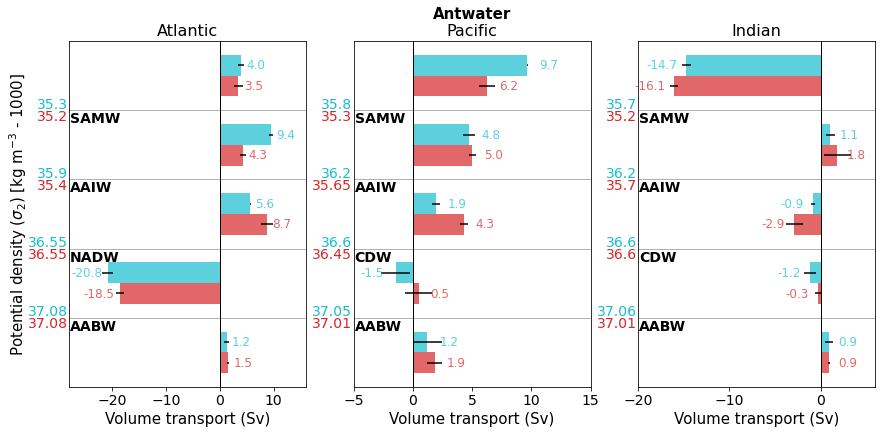

In [13]:
exp = 'antwater'

fig, axs = plt.subplots(1, 3, figsize=(14,6))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2)
fig.suptitle(exp.capitalize(),fontsize=15,fontweight='bold')
cstr = ['tab:cyan','tab:red']

for idx, name in enumerate(ddict_basin):
    
    axs[idx].axvline(x=0, c = 'k', ls='-', lw=1)
    
    y = np.arange(len(ddict_basin[name]['water_mass'])) + 0.5
    yloc = y
    
    p = []
    for m, mod in enumerate(ddict):
        x = ddict[mod][exp]['basin'][name]['vol_trsp']
        s = ddict[mod][exp]['basin'][name]['vtrsp_sd']
        p += axs[idx].barh(yloc-0.15 if mod=='CM4' else yloc+0.15, x, height=0.3 ,align='center',
                           color=cstr[m], alpha=0.7, xerr=2*s)
        
    for i, bar in enumerate(p):
        val = bar.get_width()
        axs[idx].text(bar.get_width()+1 if val>0 else bar.get_width()-1, bar.get_y() + bar.get_height() / 2.0, 
                      f'{val:.1f}', ha='right' if val<0 else 'left', va='center',fontsize=12,
                      color=bar.get_facecolor())
        
    # Add subtitles and adjust xlimit
    if name=='Atlantic':
        axs[idx].set_title('Atlantic',fontsize=16)
        axs[idx].set_xlim([-28,16])
    elif name=='Pacific':
        axs[idx].set_title('Pacific',fontsize=16)
        axs[idx].set_xlim([-5,15])
    elif name=='Indian':
        axs[idx].set_title('Indian',fontsize=16)
        axs[idx].set_xlim([-20,6])
        
    # Add water mass names
    xlimit = axs[idx].get_xlim()
    for i, yline in enumerate(y[1:]-0.5):
        axs[idx].text(xlimit[0]+abs(xlimit[1]+xlimit[0])/100, yline+0.02, ddict_basin[name]['water_mass'][i+1], 
                      fontsize=14, fontweight='bold',ha='left', va='top')
        
    axs[idx].grid(True, 'major', 'y', ls='-', lw=1, c='k', alpha=.3)
    axs[idx].tick_params(axis='both', which='both', labelsize=14,
                         bottom=True, top=False, labelbottom=True,
                         left=False, right=False, labelleft=False)
    
    axs[idx].set_ylim((0,5))
    axs[idx].set_yticks(y[1:]-0.5)
    #axs[idx].set_yticklabels([f'{val:.1f}' for val in ddict[mod][name]['sig2']])
    axs[idx].tick_params(axis='y', which='major', pad=0)
    
    # Add density values on y axis
    for m, mod in enumerate(ddict):
        for i, yline in enumerate(y[1:]-0.5):
            if mod=='CM4':
                axs[idx].text(xlimit[0]-0.15,yline-0.09,np.round(ddict[mod][exp]['basin'][name]['sig2'][i],2),
                              color='tab:cyan',fontsize=14,ha='right', va='center')
            elif mod=='ESM4':
                axs[idx].text(xlimit[0]-0.15,yline+0.09,np.round(ddict[mod][exp]['basin'][name]['sig2'][i],2),
                              color='tab:red',fontsize=14,ha='right', va='center')
    
    axs[idx].invert_yaxis()
    axs[idx].set_xlabel('Volume transport (Sv)',fontsize=15)
    axs[0].set_ylabel(r'Potential density ($\sigma_2$) [kg m$^{-3}$ - 1000]',fontsize=15,labelpad=40)

plt.show()

In [14]:
for mod in ddict:
    for exp in ddict[mod]:  
        if exp == 'control':
            continue
        for i, mem in enumerate(['251', '290', '332'] if mod=='CM4' else ['101', '151', '201']):
            for name in ddict_basin:
                #print(mod,exp,mem,name)
                ddict[mod][exp][mem]['basin'][name]['vol_trsp_anom'] = \
                    np.array(ddict[mod][exp][mem]['basin'][name]['vol_trsp']) \
                    - np.array(ddict[mod]['control']['basin'][name]['vol_trsp'])

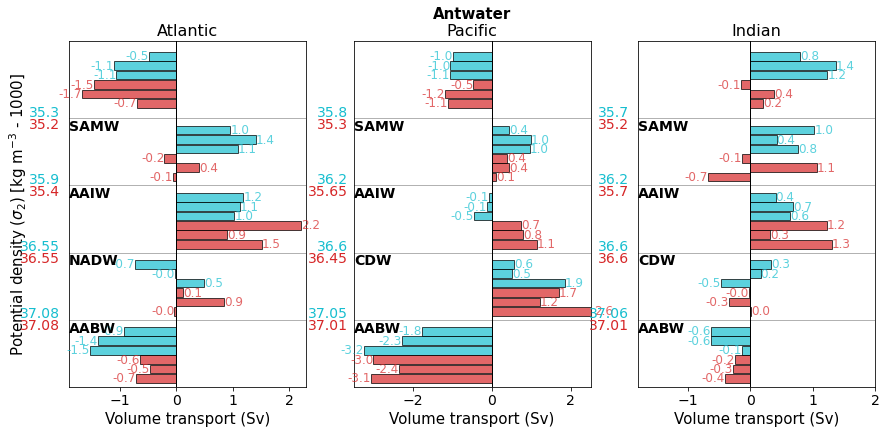

In [15]:
exp = 'antwater'
n = 6 # Number of bars to plot: 2 mod * 3 exp = 6 bars
barw = 0.10*1.3
gap = 0.01 # Gap between each bar
cstr = ['tab:cyan','tab:red']

fig, axs = plt.subplots(1, 3, figsize=(14,6))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2)
fig.suptitle(exp.capitalize(),fontsize=15,fontweight='bold')

for idx, name in enumerate(ddict_basin):
    
    axs[idx].axvline(x=0, c = 'k', ls='-', lw=1)
    
    y = np.arange(len(ddict_basin[name]['water_mass'])) + 0.5
    yloc = y + np.array([-0.1,0,0,0,0])
    
    p = []
    for m, mod in enumerate(ddict):
        for i, mem in enumerate(list(ddict[mod][exp].keys())[:-1]):
            i_bar = 3*m+i
            position = yloc + (barw*(1-n)/2) + i_bar*(barw+gap)
            x = list(np.array(ddict[mod][exp][mem]['basin'][name]['vol_trsp_anom']))
            p += axs[idx].barh(position, x, height=barw, align='center', color=cstr[m], alpha=0.7, edgecolor='k')
            
        
    for i, bar in enumerate(p):
        val = bar.get_width()
        axs[idx].text(bar.get_width(), bar.get_y() + bar.get_height() / 2.0, 
                      f'{val:.1f}', ha='right' if val<0 else 'left', va='center',fontsize=12,
                      color=bar.get_facecolor())
        
    # Add subtitles and adjust xlimit
    if name=='Atlantic':
        axs[idx].set_title('Atlantic',fontsize=16)
        axs[idx].set_xlim([-1.9,2.3])
    elif name=='Pacific':
        axs[idx].set_title('Pacific',fontsize=16)
        axs[idx].set_xlim([-3.5,2.5])
    elif name=='Indian':
        axs[idx].set_title('Indian',fontsize=16)
        axs[idx].set_xlim([-1.8,2])
        
    # Add water mass names
    xlimit = axs[idx].get_xlim()
    for i, yline in enumerate(y[1:]-0.5):
        axs[idx].text(xlimit[0]+abs(xlimit[1]+xlimit[0])/100, yline+0.02, ddict_basin[name]['water_mass'][i+1], 
                      fontsize=14, fontweight='bold',ha='left', va='top')
        
    axs[idx].grid(True, 'major', 'y', ls='-', lw=1, c='k', alpha=.3)
    axs[idx].tick_params(axis='both', which='both', labelsize=14,
                         bottom=True, top=False, labelbottom=True,
                         left=False, right=False, labelleft=False)
    
    axs[idx].set_ylim((-0.15,5))
    axs[idx].set_yticks(y[1:]-0.5)
    #axs[idx].set_yticklabels([f'{val:.1f}' for val in ddict[mod][name]['sig2']])
    axs[idx].tick_params(axis='y', which='major', pad=0)
    
    # Add density values on y axis
    for m, mod in enumerate(ddict):
        for i, yline in enumerate(y[1:]-0.5):
            if mod=='CM4':
                axs[idx].text(xlimit[0]-0.15,yline-0.09,np.round(ddict[mod][exp]['basin'][name]['sig2'][i],2),
                              color='tab:cyan',fontsize=14,ha='right', va='center')
            elif mod=='ESM4':
                axs[idx].text(xlimit[0]-0.15,yline+0.09,np.round(ddict[mod][exp]['basin'][name]['sig2'][i],2),
                              color='tab:red',fontsize=14,ha='right', va='center')
    
    axs[idx].invert_yaxis()
    axs[idx].set_xlabel('Volume transport (Sv)',fontsize=15)
    axs[0].set_ylabel(r'Potential density ($\sigma_2$) [kg m$^{-3}$ - 1000]',fontsize=15,labelpad=40)

plt.show()

In [16]:
for mod in ddict:
    for exp in ddict[mod]:  
        if exp == 'control':
            continue
            
        for name in ddict_basin:
            das=[]
            for i, mem in enumerate(['251', '290', '332'] if mod=='CM4' else ['101', '151', '201']):
                das.append(ddict[mod][exp][mem]['basin'][name]['vol_trsp_anom'])
        
            ddict[mod][exp]['basin'][name]['vtrsp_anom_sd'] = np.std(np.vstack(das),axis=0)
            ddict[mod][exp]['basin'][name]['vtrsp_anom_mn'] = np.mean(np.vstack(das),axis=0)

In [17]:
n = 6 # Number of bars to plot: 2 mod * 3 exp = 6 bars
w = 0.10 # With of each bar
gap = 0.01 # Gap between each bar
cstr = ['tab:cyan','tab:red']
htch_str = ['|||','---','+++']

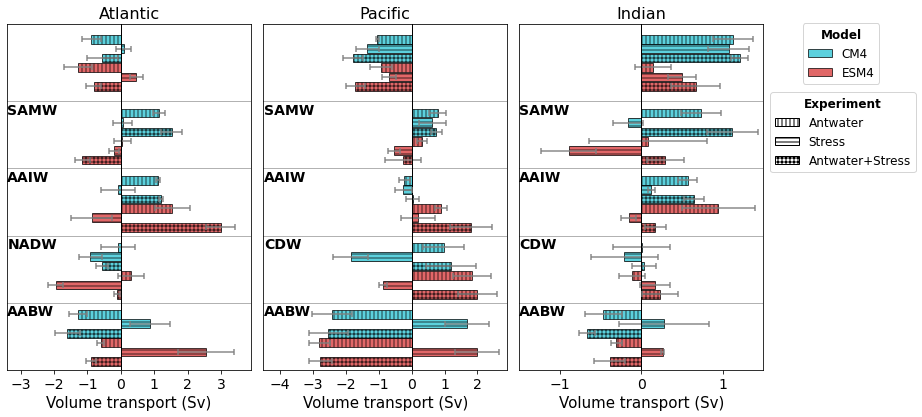

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(14,6))
fig.subplots_adjust(left=0.1, right=0.85, bottom=0.1, top=0.9, wspace=0.05)

for idx, name in enumerate(ddict_basin):
    
    axs[idx].axvline(x=0, c = 'k', ls='-', lw=1)
    
    y = np.arange(len(ddict_basin[name]['water_mass'])) + 0.5
    yloc = y + np.array([-0.1,0,0,0,0])
    
    p = []
    for m, mod in enumerate(ddict):
        for e, exp in enumerate(list(ddict[mod].keys())[1:]):
            i_bar = 3*m+e
            barw = w*1.3
            position = yloc + (barw*(1-n)/2) + i_bar*(barw+gap)
            x = list(np.array(ddict[mod][exp]['basin'][name]['vol_trsp'])\
                     -np.array(ddict[mod]['control']['basin'][name]['vol_trsp']))
            #x = ddict[mod][exp]['basin'][name]['vtrsp_anom_mn']
            s = ddict[mod][exp]['basin'][name]['vtrsp_anom_sd']
            p += axs[idx].barh(position, x, height=barw, align='center', color=cstr[m], 
                               hatch=htch_str[e], alpha=0.7, edgecolor='k', xerr=1*s,
                               error_kw=dict(ecolor='gray', lw=2, capsize=3, capthick=2, alpha=0.7))
        
    for i, bar in enumerate(p):
        val = bar.get_width()
        #axs[idx].text(bar.get_width(), bar.get_y() + bar.get_height() / 2.0 , 
        #              f'{val:.1f}', ha='right' if val<0 else 'left', va='center',fontsize=11,
        #              color=bar.get_facecolor())
        
    # Add subtitles and adjust xlimit
    if name=='Atlantic':
        axs[idx].set_title('Atlantic',fontsize=16)
        axs[idx].set_xlim([-3.4,3.9])
        axs[idx].set_xticks(np.arange(-3,4,1))
    elif name=='Pacific':
        axs[idx].set_title('Pacific',fontsize=16)
        axs[idx].set_xlim([-4.5,2.9])
        axs[idx].set_xticks(np.arange(-4,3,1))
    elif name=='Indian':
        axs[idx].set_title('Indian',fontsize=16)
        axs[idx].set_xlim([-1.5,1.5])
        axs[idx].set_xticks(np.arange(-1,2,1))
        
    # Add water mass names
    xlimit = axs[idx].get_xlim()
    for i, yline in enumerate(y[1:]-0.5):
        axs[idx].text(xlimit[0]+abs(xlimit[1]+xlimit[0])/100, yline+0.02, ddict_basin[name]['water_mass'][i+1], 
                      fontsize=14, fontweight='bold',ha='left', va='top')
        
    axs[idx].grid(True, 'major', 'y', ls='-', lw=1, c='k', alpha=.3)
    axs[idx].tick_params(axis='both', which='both', labelsize=14,
                         bottom=True, top=False, labelbottom=True,
                         left=False, right=False, labelleft=False)
    
    # Adjust y scale
    axs[idx].set_ylim((-0.15,5))
    axs[idx].set_yticks(y[1:]-0.5)
    axs[idx].tick_params(axis='y', which='major', pad=0)    
    axs[idx].invert_yaxis()
    axs[idx].set_xlabel('Volume transport (Sv)',fontsize=15)

#axs[0].set_ylabel(r'Potential density ($\sigma_2$) [kg m$^{-3}$ - 1000]',fontsize=15,labelpad=10)
p1=axs[2].barh(-5, 1, height=w, align='center', color=cstr[0],alpha=0.7,edgecolor='k',label='CM4')
p2=axs[2].barh(-4, 1, height=w, align='center', color=cstr[1],alpha=0.7,edgecolor='k',label='ESM4')
p3=axs[2].barh(-3, 1, height=w, align='center', fill=False,edgecolor='k',hatch=htch_str[0],label='Antwater')
p4=axs[2].barh(-2, 1, height=w, align='center', fill=False,edgecolor='k',hatch=htch_str[1],label='Stress')
p5=axs[2].barh(-1, 1, height=w, align='center', fill=False,edgecolor='k',hatch=htch_str[2],label='Antwater+Stress')

leg1 = axs[2].legend(handles=[p1,p2],frameon=True, fancybox=True, bbox_to_anchor=(1.5, 1.02), loc='upper right', 
              ncol=1, fontsize=12, title='Model')
plt.setp(leg1.get_title(),fontsize=12,fontweight='bold')
axs[2].add_artist(leg1)
leg2 = axs[2].legend(handles=[p3, p4, p5],frameon=True, fancybox=True, bbox_to_anchor=(1.65, 0.82), 
                     loc='upper right', ncol=1, fontsize=12, title='Experiment')
plt.setp(leg2.get_title(),fontsize=12,fontweight='bold')

plt.savefig('/home/jt7058/figure.png', dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', format='png',transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.show()

### Table 2
Change in meridional transport at 30$^\circ$S in the perturbation experiments (Antwater, Stress and AntwaterStress) relative to the preindustrial control for CM4 and ESM4. Values are derived by taking the average of the last 20 years (year 51-70) of the ensemble mean minus a 100-year average of the corresponding control run. Percent change is only shown in the case where the standard deviation envelope does not include zero. Values in bold are absolute changes that correspond to more than 50% change compared to the control run and are outside of $\pm$2 standard deviations. The transport changes are presented separately for the main water masses of the SO starting with the densest water mass (AABW). The values correspond to the same classes presented in Table 1, excluding TW and adding the changes for the intermediate water masses (AAIW & SAMW) together. CDW corresponds to NADW, PDW and IDW together.

In [19]:
wm_str = 'SAMW' # AABW, CDW, AAIW/SAMW
tot_exp=0
tot_ctr=0
for idx, name in enumerate(ddict_basin):
    
    if wm_str in ['NADW','CDW']:
        #print(wm_str)
        wm_str='NADW' if name=='Atlantic' else 'CDW'
        #print(wm_str)
    
    row_str = ''
    for e, exp in enumerate(list(ddict[mod].keys())[1:]):
        #print(exp)
        for m, mod in enumerate(ddict):
            #print(mod)
            
            if wm_str in ['AAIW','SAMW']:
                x_exp = 0
                x_ctr = 0
                sd_sq = 0
                for wm_str in ['AAIW','SAMW']:
                    x_exp += ddict[mod][exp]['basin'][name]['vol_trsp'][ddict_basin[name]['water_mass'].index(wm_str)]
                    x_ctr += ddict[mod]['control']['basin'][name]['vol_trsp'][ddict_basin[name]['water_mass'].index(wm_str)]
                    sd_sq += ddict[mod][exp]['basin'][name]['vtrsp_anom_sd'][ddict_basin[name]['water_mass'].index(wm_str)]**2
                    sd = np.sqrt(sd_sq)
                    
            else:
                x_exp = ddict[mod][exp]['basin'][name]['vol_trsp'][ddict_basin[name]['water_mass'].index(wm_str)]
                x_ctr = ddict[mod]['control']['basin'][name]['vol_trsp'][ddict_basin[name]['water_mass'].index(wm_str)]
                sd = ddict[mod][exp]['basin'][name]['vtrsp_anom_sd'][ddict_basin[name]['water_mass'].index(wm_str)]
            
            x_diff = str(np.round(x_exp-x_ctr,1)) if (x_exp-x_ctr)<0 else '+'+str(np.round(x_exp-x_ctr,1))
            
            if wm_str in ['NADW','CDW']:
                pct_diff = '+'+str(int(np.round((x_exp-x_ctr)/abs(x_ctr),2)*100)*-1) if (x_exp-x_ctr)<0 \
                            else '-'+str(int(np.round((x_exp-x_ctr)/abs(x_ctr),2)*100))
            else:
                pct_diff = str(int(np.round((x_exp-x_ctr)/abs(x_ctr),2)*100)) if (x_exp-x_ctr)<0 \
                            else '+'+str(int(np.round((x_exp-x_ctr)/abs(x_ctr),2)*100))
            
            if (abs(x_exp-x_ctr)-2*sd > 0) & (abs(float(pct_diff))>50):
                x_str = '\\textbf{'+x_diff+'$\pm$'+str(np.round(sd,1))+'~Sv}'
            else:
                x_str = x_diff+'$\pm$'+str(np.round(sd,1))+'~Sv'

            row_str += ' & '+x_str+' ('+pct_diff+'~\%)' if abs(np.round(x_exp-x_ctr,1))-np.round(sd,1) > 0 \
                        else ' & '+x_str
    
    print(name+row_str,'\\'+'\\')

Atlantic & +2.3$\pm$0.2~Sv (+18~\%) & +1.6$\pm$0.6~Sv (+14~\%) & -0.0$\pm$0.6~Sv & -1.1$\pm$0.6~Sv (-9~\%) & +2.7$\pm$0.3~Sv (+21~\%) & +1.8$\pm$0.5~Sv (+16~\%) \\
Pacific & +0.6$\pm$0.3~Sv (+9~\%) & +1.2$\pm$0.2~Sv (+15~\%) & +0.4$\pm$0.5~Sv & -0.3$\pm$0.5~Sv & +0.8$\pm$0.3~Sv (+13~\%) & +1.5$\pm$0.8~Sv (+19~\%) \\
Indian & \textbf{+1.3$\pm$0.3~Sv} (+117~\%) & +1.0$\pm$0.9~Sv (+49~\%) & -0.0$\pm$0.2~Sv & -1.0$\pm$0.4~Sv (-50~\%) & \textbf{+1.8$\pm$0.3~Sv} (+159~\%) & +0.5$\pm$0.3~Sv (+23~\%) \\


In [20]:
row_str = ''
for e, exp in enumerate(list(ddict[mod].keys())[1:]):
    #print(exp)
    for m, mod in enumerate(ddict):
        #print(mod)
        
        tot_exp=0
        tot_ctr=0
        tot_sd = 0
        for name in ddict_basin:
            
            if wm_str in ['NADW','CDW']:
                wm_str='NADW' if name=='Atlantic' else 'CDW'
                
            if wm_str in ['AAIW','SAMW']:
                x_exp = 0
                x_ctr = 0
                sd_sq = 0
                for wm_str in ['AAIW','SAMW']:
                    x_exp += ddict[mod][exp]['basin'][name]['vol_trsp'][ddict_basin[name]['water_mass'].index(wm_str)]
                    x_ctr += ddict[mod]['control']['basin'][name]['vol_trsp'][ddict_basin[name]['water_mass'].index(wm_str)]
                    sd_sq += ddict[mod][exp]['basin'][name]['vtrsp_anom_sd'][ddict_basin[name]['water_mass'].index(wm_str)]**2
                    
                tot_exp += x_exp
                tot_ctr += x_ctr
                tot_sd+=sd_sq
                    
            else:
                tot_exp += ddict[mod][exp]['basin'][name]['vol_trsp'][ddict_basin[name]['water_mass'].index(wm_str)]
                tot_ctr += ddict[mod]['control']['basin'][name]['vol_trsp'][ddict_basin[name]['water_mass'].index(wm_str)]
                tot_sd+=ddict[mod][exp]['basin'][name]['vtrsp_anom_sd'][ddict_basin[name]['water_mass'].index(wm_str)]**2
            
        x_diff = str(np.round(tot_exp-tot_ctr,1)) if (tot_exp-tot_ctr)<0 else '+'+str(np.round(tot_exp-tot_ctr,1))
        
        if wm_str in ['NADW','CDW']:
            pct_diff = '+'+str(int(np.round((tot_exp-tot_ctr)/abs(tot_ctr),2)*100)*-1) if (tot_exp-tot_ctr)<0 \
                        else '-'+str(int(np.round((tot_exp-tot_ctr)/abs(tot_ctr),2)*100))
        else:
            pct_diff = str(int(np.round((tot_exp-tot_ctr)/abs(tot_ctr),2)*100)) if (tot_exp-tot_ctr)<0 \
                        else '+'+str(int(np.round((tot_exp-tot_ctr)/abs(tot_ctr),2)*100))
            
        if (abs(tot_exp-tot_ctr)-2*np.sqrt(tot_sd) > 0) & (abs(float(pct_diff))>50):
            x_str = '\\textbf{'+x_diff+'$\pm$'+str(np.round(np.sqrt(tot_sd),1))+'~Sv}'
        else:
            x_str = x_diff+'$\pm$'+str(np.round(np.sqrt(tot_sd),1))+'~Sv'
            
        row_str += ' & '+x_str+' ('+pct_diff+'~\%)' \
                    if abs(np.round(tot_exp-tot_ctr,1))-np.round(np.sqrt(tot_sd),1) > 0 \
                    else ' & '+x_str

print('Total'+row_str,'\\'+'\\')

Total & +4.1$\pm$0.5~Sv (+23~\%) & +3.8$\pm$1.1~Sv (+22~\%) & +0.3$\pm$0.8~Sv & -2.5$\pm$0.9~Sv (-14~\%) & +5.3$\pm$0.5~Sv (+30~\%) & +3.8$\pm$1.0~Sv (+22~\%) \\


In [21]:
mod, exp = 'ESM4', 'stress'
name = 'Indian'
x_exp = ddict[mod][exp]['basin'][name]['vol_trsp'][ddict_basin[name]['water_mass'].index(wm_str)]
x_ctr = ddict[mod]['control']['basin'][name]['vol_trsp'][ddict_basin[name]['water_mass'].index(wm_str)]
sd = ddict[mod][exp]['basin'][name]['vtrsp_anom_sd'][ddict_basin[name]['water_mass'].index(wm_str)]

x_diff = str(np.round(x_exp-x_ctr,1)) if (x_exp-x_ctr)<0 else '+'+str(np.round(x_exp-x_ctr,1))
            
if wm_str in ['NADW','CDW']:
    pct_diff = '+'+str(int(np.round((x_exp-x_ctr)/abs(x_ctr),2)*100)*-1) if (x_exp-x_ctr)<0 \
            else '-'+str(int(np.round((x_exp-x_ctr)/abs(x_ctr),2)*100))
else:
    pct_diff = str(int(np.round((x_exp-x_ctr)/abs(x_ctr),2)*100)) if (x_exp-x_ctr)<0 \
            else '+'+str(int(np.round((x_exp-x_ctr)/abs(x_ctr),2)*100))
        
if (abs(x_exp-x_ctr)-2*sd > 0) & (abs(float(pct_diff))>50):
    x_str = '\\textbf{'+x_diff+'$\pm$'+str(np.round(sd,1))+'~Sv}'
else:
    x_str = x_diff+'$\pm$'+str(np.round(sd,1))+'~Sv'

print(' & '+x_str+' ('+pct_diff+'~\%)' if abs(np.round(x_exp-x_ctr,1))-sd > 0 \
                        else ' & '+x_str)

 & \textbf{-0.9$\pm$0.3~Sv} (-51~\%)


In [23]:
wm_str = 'AABW' # AABW, CDW, AAIW, SAMW
mod, exp = 'CM4', 'antwater'
tot_exp=0
tot_ctr=0
tot_sd = 0
for name in ddict_basin:
    tot_exp += ddict[mod][exp]['basin'][name]['vol_trsp'][ddict_basin[name]['water_mass'].index(wm_str)]
    tot_ctr += ddict[mod]['control']['basin'][name]['vol_trsp'][ddict_basin[name]['water_mass'].index(wm_str)]
    tot_sd+=ddict[mod][exp]['basin'][name]['vtrsp_anom_sd'][ddict_basin[name]['water_mass'].index(wm_str)]**2
    print(tot_exp,tot_ctr,tot_sd)

x_diff = str(np.round(tot_exp-tot_ctr,1)) if (tot_exp-tot_ctr)<0 else '+'+str(np.round(tot_exp-tot_ctr,1))
pct_diff = str(int(np.round((tot_exp-tot_ctr)/tot_ctr,2)*100)) if (tot_exp-tot_ctr)<0 \
            else '+'+str(int(np.round((tot_exp-tot_ctr)/tot_ctr,2)*100))
print('Total',x_diff+'+-'+str(np.round(np.sqrt(tot_sd),1))+' Sv ('+pct_diff+'%)')

1.2446603766666666 2.52412 0.06769037014561444
2.4771185433333334 6.1834003 0.4349393986324299
3.4253396433333334 7.5966773 0.4887410764446899
Total -4.2+-0.7 Sv (-55%)
